In [6]:
import os
import pandas as pd
from collections import defaultdict

# outputs (no validation)

In [ ]:
IN_DIR = 'outputs'
dirs = sorted([os.path.join(IN_DIR,d) for d in os.listdir(IN_DIR)])
out_d = defaultdict(list)
for d in dirs:
    log_dir = os.path.join(d,'train.log')
    args_dir = os.path.join(d,'args.csv')
    if not os.path.exists(log_dir) or not os.path.exists(args_dir):
        continue
    df = pd.read_csv(log_dir)
    arg = pd.read_csv(args_dir)
    mode = arg.loc[0,'mode']
    arg['dir'] = d
    df['dir'] = d
    out_d[mode].append(df)   
    out_d['args'].append(arg)

In [ ]:
args = pd.concat(out_d['args'], ignore_index = True, sort = False)
df_c = pd.concat(out_d['cat'], ignore_index = True, sort = False)
df_h = pd.concat(out_d['hierarchy'], ignore_index = True, sort = False)

### outputs/cnnxml,attentionxml,attention

In [ ]:
df2 = df_c.merge(args,on='dir',suffixes=('_outputs', '_args'))
df2 = df2[df2.epoch_outputs==4]

# df2 = df2[df2['model']=='bert']
# df2 = df2[df2['input']=='data/sic_hierarchy']
# df2 = df2[df2['input']=='data/amazon_hierarchy']
df2 = df2[df2['input']=='data/amazon_hierarchy_2']
df2.loc[:,['dir','loss_args','bert_bottle_neck']+[c for c in df2.columns if 'pAt1' in c]]

In [ ]:
df1 = df_h.merge(args,on='dir',suffixes=('_outputs', '_args'))
df1 = df1[df1.epoch_outputs==4]
df1.loc[:,['model','loss_args']+[c for c in df1.columns if c.startswith('val') and not c.endswith('loss')]]

### outputs/bert

In [ ]:
# heirarchical
df = df_h.merge(args,on='dir',suffixes=('_outputs', '_args'))
df = df[df.epoch_outputs==2]
df = df[df['model']=='bert']
df.loc[:,['dir','model','loss_args']+\
        [c for c in df.columns if c.startswith('bert')]+\
        [c for c in df.columns if c.startswith('val') and not c.endswith('loss')]]

In [ ]:
# catergorical
df = df_c.merge(args,on='dir',suffixes=('_outputs', '_args'))
df = df[df.epoch_outputs==2]
df = df[df['model']=='bert']
df.loc[:,['dir','model','loss_args']+\
        [c for c in df.columns if c.startswith('bert')]+\
        [c for c in df.columns if c.startswith('val') and not c.endswith('loss')]]

# bert validation

In [7]:
IN_DIR = 'bert_val'
dirs = sorted([os.path.join(IN_DIR,d) for d in os.listdir(IN_DIR)])
out_d = defaultdict(list)
for d in dirs:
    log_dir = os.path.join(d,'train.log')
    args_dir = os.path.join(d,'args.csv')
    if not os.path.exists(log_dir) or not os.path.exists(args_dir):
        continue
    df = pd.read_csv(log_dir)
    arg = pd.read_csv(args_dir)
    mode = arg.loc[0,'mode']
    arg['dir'] = d
    df['dir'] = d
    out_d[mode].append(df)   
    out_d['args'].append(arg)

In [8]:
args = pd.concat(out_d['args'], ignore_index = True,sort=False)
df_h = pd.concat(out_d['hierarchy'], ignore_index = True,sort=False)
df_c = pd.concat(out_d['cat'], ignore_index = True,sort=False)

In [9]:
# hierarchical
df2 = df_h.merge(args,on='dir',suffixes=('_outputs', '_args'))

In [10]:
df2.loc[:,['dir','epoch_outputs','bert_bottle_neck']+[c for c in df2.columns if 'pAt1' in c]]

,dir,epoch_outputs,bert_bottle_neck,pAt1,val_pAt1
0,bert_val/190820_175502_bert,0,0,0.472799,0.520966
1,bert_val/190820_175502_bert,1,0,0.540399,0.532329
2,bert_val/190820_175502_bert,2,0,0.565600,0.536461
3,bert_val/190820_175502_bert,evaluate,0,0.538289,NaN
4,bert_val/190820_203835_bert,0,256,0.418140,0.507625
5,bert_val/190820_203835_bert,1,256,0.503502,0.525369
6,bert_val/190820_203835_bert,2,256,0.528494,0.531629
7,bert_val/190820_203835_bert,evaluate,256,0.533126,NaN
8,bert_val/190820_232510_bert,0,128,0.399279,0.501943
9,bert_val/190820_232510_bert,1,128,0.492687,0.522699


In [17]:
# categorical 
df2 = df_c.merge(args,on='dir',suffixes=('_outputs', '_args'))

In [21]:
df2['val_mean_pAt1']=df2[[c for c in df2.columns if c.startswith('val') and 'pAt1' in c]].mean(axis=1)
df2['train_mean_pAt1']=df2[[c for c in df2.columns if not c.startswith('val') and 'pAt1' in c]].mean(axis=1)

In [22]:
df2.loc[:,['dir','input','epoch_outputs','bert_bottle_neck','train_mean_pAt1','val_mean_pAt1']]

,dir,input,epoch_outputs,bert_bottle_neck,train_mean_pAt1,val_mean_pAt1
0,bert_val/190821_021134_bert,data/sic_hierarchy,0,0,0.553645,0.600051
1,bert_val/190821_021134_bert,data/sic_hierarchy,1,0,0.618624,0.612711
2,bert_val/190821_021134_bert,data/sic_hierarchy,2,0,0.640690,0.618067
3,bert_val/190821_021134_bert,data/sic_hierarchy,evaluate,0,0.617330,NaN
4,bert_val/190821_045429_bert,data/sic_hierarchy,0,512,0.505024,0.590338
5,bert_val/190821_045429_bert,data/sic_hierarchy,1,512,0.588555,0.608967
6,bert_val/190821_045429_bert,data/sic_hierarchy,2,512,0.613950,0.615421
7,bert_val/190821_045429_bert,data/sic_hierarchy,evaluate,512,0.615687,NaN
8,bert_val/190821_073946_bert,data/sic_hierarchy,0,256,0.479688,0.584129
9,bert_val/190821_073946_bert,data/sic_hierarchy,1,256,0.574815,0.604960


In [5]:
df2.loc[:,['dir','input','epoch_outputs','bert_bottle_neck']+[c for c in df2.columns if '_pAt1' in c]]

,dir,input,epoch_outputs,bert_bottle_neck,H0_pAt1,H1_pAt1,H2_pAt1,H3_pAt1,val_H0_pAt1,val_H1_pAt1,val_H2_pAt1,val_H3_pAt1
0,bert_val/190821_021134_bert,data/sic_hierarchy,0,0,0.685869,0.611667,0.470034,0.447010,0.714274,0.647840,0.528985,0.509104
1,bert_val/190821_021134_bert,data/sic_hierarchy,1,0,0.728691,0.663868,0.550345,0.531593,0.721252,0.656313,0.546152,0.527129
2,bert_val/190821_021134_bert,data/sic_hierarchy,2,0,0.747504,0.684808,0.574382,0.556065,0.723493,0.659754,0.553365,0.535656
3,bert_val/190821_021134_bert,data/sic_hierarchy,evaluate,0,0.721651,0.660154,0.552474,0.535039,NaN,NaN,NaN,NaN
4,bert_val/190821_045429_bert,data/sic_hierarchy,0,512,0.650523,0.573502,0.411245,0.384827,0.713653,0.642412,0.514549,0.490738
5,bert_val/190821_045429_bert,data/sic_hierarchy,1,512,0.707041,0.638992,0.515248,0.492940,0.722101,0.655526,0.539105,0.519137
6,bert_val/190821_045429_bert,data/sic_hierarchy,2,512,0.728966,0.662216,0.542913,0.521706,0.725515,0.660314,0.547220,0.528635
7,bert_val/190821_045429_bert,data/sic_hierarchy,evaluate,512,0.723815,0.660428,0.548755,0.529750,NaN,NaN,NaN,NaN
8,bert_val/190821_073946_bert,data/sic_hierarchy,0,256,0.630847,0.551083,0.383196,0.353626,0.713128,0.641248,0.503861,0.478281
9,bert_val/190821_073946_bert,data/sic_hierarchy,1,256,0.696556,0.626425,0.500486,0.475793,0.723081,0.654913,0.531742,0.510102


# plot training epochs overfit

In [28]:
df3 = df2.loc[:,['dir','input','epoch_outputs','bert_bottle_neck','train_mean_pAt1','val_mean_pAt1']]
# df3 = df3.set_index(['dir','input']).sort_index()

In [26]:
df3.set_index(['dir','input']).sort_index()

epoch_outputs  \
dir                         input                                   
bert_val/190821_021134_bert data/sic_hierarchy                  0   
                            data/sic_hierarchy                  1   
                            data/sic_hierarchy                  2   
                            data/sic_hierarchy           evaluate   
bert_val/190821_045429_bert data/sic_hierarchy                  0   
                            data/sic_hierarchy                  1   
                            data/sic_hierarchy                  2   
                            data/sic_hierarchy           evaluate   
bert_val/190821_073946_bert data/sic_hierarchy                  0   
                            data/sic_hierarchy                  1   
                            data/sic_hierarchy                  2   
                            data/sic_hierarchy           evaluate   
bert_val/190822_015430_bert data/sic_hierarchy                  0   
                            data/sic_hierarchy                  1   
                            data/sic_hierarchy                  2   
                            data/sic_hierarchy                  3   
                            data/sic_hierarchy                  4   
                            data/sic_hierarchy           evaluate   
bert_val/190822_061144_bert data/sic_hierarchy                  0   
                            data/sic_hierarchy                  1   
                            data/sic_hierarchy                  2   
                            data/sic_hierarchy                  3   
                            data/sic_hierarchy                  4   
                            data/sic_hierarchy           evaluate   
bert_val/190822_103332_bert data/sic_hierarchy                  0   
                            data/sic_hierarchy                  1   
                            data/sic_hierarchy                  2   
                            data/sic_hierarchy                  3   
                            data/sic_hierarchy                  4   
                            data/sic_hierarchy           evaluate   
bert_val/190826_162038_bert data/amazon_hierarchy_2             0   
                            data/amazon_hierarchy_2             1   
                            data/amazon_hierarchy_2             2   
                            data/amazon_hierarchy_2      evaluate   
bert_val/190828_033151_bert data/amazon_hierarchy_2             0   
                            data/amazon_hierarchy_2             1   
                            data/amazon_hierarchy_2             2   
                            data/amazon_hierarchy_2      evaluate   

                                                     bert_bottle_neck  \
dir                         input                                       
bert_val/190821_021134_bert data/sic_hierarchy                      0   
                            data/sic_hierarchy                      0   
                            data/sic_hierarchy                      0   
                            data/sic_hierarchy                      0   
bert_val/190821_045429_bert data/sic_hierarchy                    512   
                            data/sic_hierarchy                    512   
                            data/sic_hierarchy                    512   
                            data/sic_hierarchy                    512   
bert_val/190821_073946_bert data/sic_hierarchy                    256   
                            data/sic_hierarchy                    256   
                            data/sic_hierarchy                    256   
                            data/sic_hierarchy                    256   
bert_val/190822_015430_bert data/sic_hierarchy                      0   
                            data/sic_hierarchy                      0   
                            data/sic_hierarchy                      0   
                            data/sic_hierarchy    

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

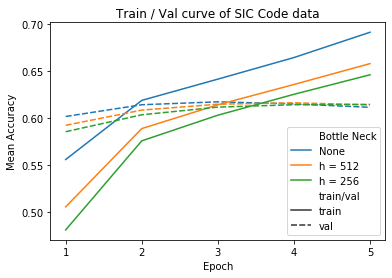

In [62]:
df4 = df3[df3['dir'].isin(['bert_val/190822_015430_bert','bert_val/190822_061144_bert','bert_val/190822_103332_bert'])]
df4 = df4[df4['epoch_outputs']!='evaluate']
df4 = df4.melt( id_vars=['epoch_outputs','bert_bottle_neck'],
               value_vars = ['train_mean_pAt1','val_mean_pAt1'],
               value_name='mean accuracy',
               var_name = 'train/val',
              )
df4['train/val'] = df4['train/val'].apply(lambda x:x.split('_')[0])
df4['Bottle Neck'] = df4['bert_bottle_neck'].apply(lambda x: 'h = {}'.format(x) if x>0 else 'None')
fig,ax = plt.subplots()
sns.lineplot(
    data=df4,
    x='epoch_outputs',
    y='mean accuracy',
    hue='Bottle Neck',
    ax=ax,
    style="train/val",
#     markers = 'x',
#     palette='Reds'
)
ax.set_xticklabels([1,2,3,4,5])
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Train / Val curve of SIC Code data')
plt.show()

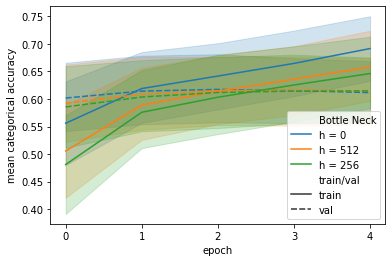

In [56]:
df4 = df2[df2['dir'].isin(['bert_val/190822_015430_bert','bert_val/190822_061144_bert','bert_val/190822_103332_bert'])]
df4 = df4[df4['epoch_outputs']!='evaluate']
df4 = df4.melt( id_vars=['epoch_outputs','bert_bottle_neck'],
               value_vars = [c for c in df4.columns if '_pAt1' in c],
               value_name='mean accuracy',
               var_name = 'train/val',
              )
df4['train/val'] = df4['train/val'].apply(lambda x:'val' if x.split('_')[0]=='val' else 'train')
df4['Bottle Neck'] = df4['bert_bottle_neck'].apply(lambda x: 'h = {}'.format(x))
fig,ax = plt.subplots()
sns.lineplot(
    data=df4,
    x='epoch_outputs',
    y='mean accuracy',
    hue='Bottle Neck',
    ax=ax,
    style="train/val",
#     markers = 'x',
#     palette='Reds'
)
ax.set_xlabel('epoch')
ax.set_ylabel('mean categorical accuracy')
plt.show()